# Load the data

In [87]:
import numpy as np
import pandas as pd
import tarfile as tf
from pathlib import Path
import urllib.request as net
import matplotlib.pyplot as plt

def load_dataset():
    required_file = Path("datasets/housing.tgz")
    if required_file.is_file() == False:
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        net.urlretrieve(url, required_file)
        with tf.open(required_file) as housing_dataset:
            housing_dataset.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Glance at the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
INFO: 
None
DESCRIBE: 
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.00

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


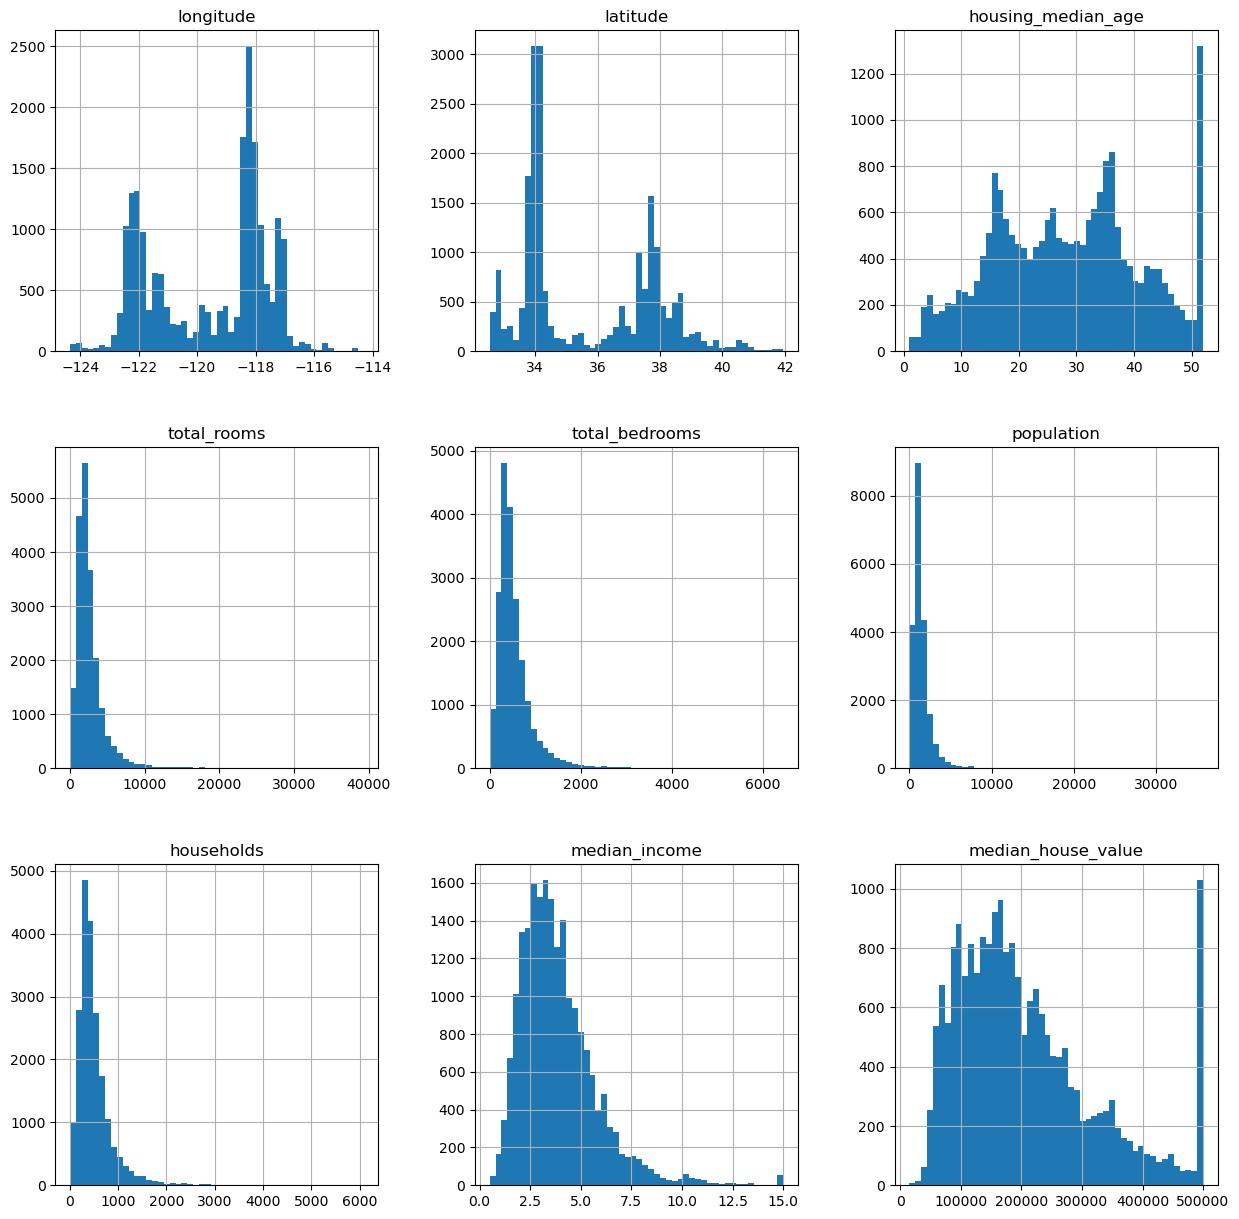

In [88]:
housing_dataset = load_dataset()
print(f"INFO: \n{housing_dataset.info()}")
print(f"DESCRIBE: \n{housing_dataset.describe()}")
housing_dataset.hist(bins = 50, figsize=(15, 15)),
plt.savefig("overview.png")
housing_dataset.head()

# Create a test set

It is important to set aside ~20% of our data for test set.

In [89]:
print(housing_dataset.head())
housing_dataset["incomeCatagoty"] = pd.cut(housing_dataset["median_income"], bins= (0, 1.5, 3, 4.5, 6, np.inf), labels= ("rank 1", "rank 2", "rank 3", "rank 4", "rank 5"))
 # We are adding a category attribute based on median income. Since, mostly based on median income we will predict house price.
housing_dataset.head()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incomeCatagoty
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,rank 5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,rank 5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,rank 5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,rank 4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,rank 3


Text(0.5, 1.0, 'MedianIncome')

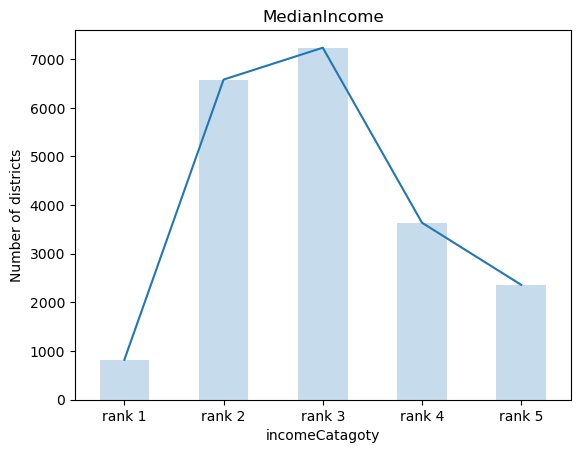

In [90]:
housing_dataset["incomeCatagoty"].value_counts().sort_index().plot.bar(rot=0, grid = True, alpha = 0.25)
housing_dataset["incomeCatagoty"].value_counts().sort_index().plot()
plt.ylabel("Number of districts")
plt.title("MedianIncome")

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit as SSS

In [92]:
Spliter = SSS(n_splits=10, test_size= 0.2, random_state= 67)

train_test_pair_of_housing_datasets = []

for train, test in Spliter.split(housing_dataset, housing_dataset["incomeCatagoty"]):
    train_set = housing_dataset.iloc[train]
    test_set = housing_dataset.iloc[test]
    train_test_pair_of_housing_datasets.append([train_set, test_set])
train_test_pair_of_housing_datasets[0][0].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incomeCatagoty
3998,-119.23,34.46,34.0,9280.0,1765.0,4514.0,1693.0,3.2026,227600.0,<1H OCEAN,rank 3
13106,-119.76,36.73,39.0,1553.0,363.0,1449.0,341.0,1.4419,45500.0,INLAND,rank 1
6471,-122.18,37.73,44.0,548.0,119.0,435.0,136.0,2.1111,79700.0,NEAR BAY,rank 2
7877,-121.78,37.97,4.0,17032.0,2546.0,7653.0,2359.0,5.5601,213700.0,INLAND,rank 4
6852,-121.14,37.48,6.0,1772.0,332.0,1011.0,331.0,3.7045,128100.0,INLAND,rank 3


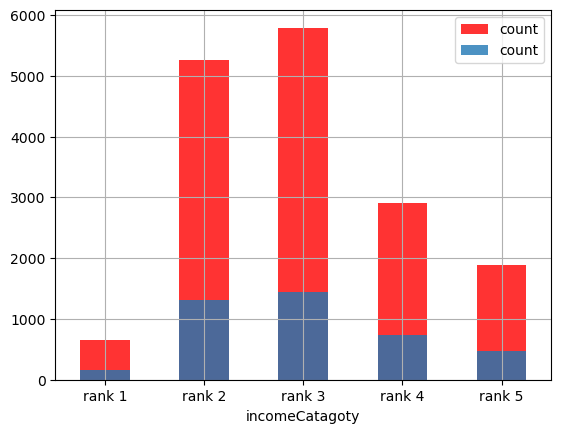

In [93]:
train_test_pair_of_housing_datasets[0][0]["incomeCatagoty"].value_counts().sort_index().plot.bar(rot = 0, grid = True, alpha = 0.8, color = "red", legend = "TrainSet") #Train set
train_test_pair_of_housing_datasets[0][1]["incomeCatagoty"].value_counts().sort_index().plot.bar(rot = 0, grid = True, alpha = 0.8, legend = "TestSet") #Test set
# Ratio is almost identical
plt.legend(loc="best")

In [94]:
print(train_test_pair_of_housing_datasets[0][0].head())
#lets get rid of inconeCategory attribute
for dfPair in train_test_pair_of_housing_datasets:
    for df in dfPair:
        df.drop("incomeCatagoty", axis = 1, inplace = True)
train_test_pair_of_housing_datasets[0][0].head()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3998     -119.23     34.46                34.0       9280.0          1765.0   
13106    -119.76     36.73                39.0       1553.0           363.0   
6471     -122.18     37.73                44.0        548.0           119.0   
7877     -121.78     37.97                 4.0      17032.0          2546.0   
6852     -121.14     37.48                 6.0       1772.0           332.0   

       population  households  median_income  median_house_value  \
3998       4514.0      1693.0         3.2026            227600.0   
13106      1449.0       341.0         1.4419             45500.0   
6471        435.0       136.0         2.1111             79700.0   
7877       7653.0      2359.0         5.5601            213700.0   
6852       1011.0       331.0         3.7045            128100.0   

      ocean_proximity incomeCatagoty  
3998        <1H OCEAN         rank 3  
13106          INLAND         rank 1  

C:\Users\momin\AppData\Local\Temp\ipykernel_14396\3656660086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("incomeCatagoty", axis = 1, inplace = True)
C:\Users\momin\AppData\Local\Temp\ipykernel_14396\3656660086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("incomeCatagoty", axis = 1, inplace = True)
C:\Users\momin\AppData\Local\Temp\ipykernel_14396\3656660086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3998,-119.23,34.46,34.0,9280.0,1765.0,4514.0,1693.0,3.2026,227600.0,<1H OCEAN
13106,-119.76,36.73,39.0,1553.0,363.0,1449.0,341.0,1.4419,45500.0,INLAND
6471,-122.18,37.73,44.0,548.0,119.0,435.0,136.0,2.1111,79700.0,NEAR BAY
7877,-121.78,37.97,4.0,17032.0,2546.0,7653.0,2359.0,5.5601,213700.0,INLAND
6852,-121.14,37.48,6.0,1772.0,332.0,1011.0,331.0,3.7045,128100.0,INLAND


In [98]:
firstPairDF = train_test_pair_of_housing_datasets[0]
firstTrainDF = firstPairDF[0]
firstTestDF = firstPairDF[1]
print(firstTestDF.info())
firstTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 3054 to 12311
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4089 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 3998 to 13271
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  f